In [1]:
import zipfile
import os

with zipfile.ZipFile("/content/GPUPy.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [2]:
os.listdir("/content/")

import sys
sys.path.append("/content")

Size: 1000 | CPU: 0.00019 seconds | GPU: 1.05507 seconds
Size: 5000 | CPU: 0.00040 seconds | GPU: 5.87382 seconds
Size: 10000 | CPU: 0.00058 seconds | GPU: 11.50034 seconds
Size: 20000 | CPU: 0.00091 seconds | GPU: 22.06621 seconds


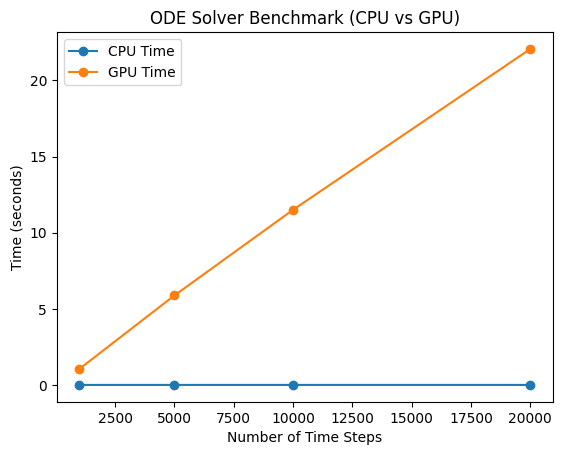

In [31]:
import numpy as np
import cupy as cp
import time
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from GPUPy.src.numerical_methods.ode_solver import odeint_wrapper
from GPUPy.src.numerical_methods.utils import choose_backend

# Basit bir ODE örneği: dx/dt = -0.5 * x
def model(t, x):
    return -0.5 * x

def benchmark_ode_solver():
    sizes = [1000, 5000, 10000, 20000]  # ODE çözümü için farklı adım sayıları
    cpu_times = []
    gpu_times = []

    for size in sizes:
        # Başlangıç koşulu ve zaman aralığı
        y0 = np.array([1.0])  # Başlangıç koşulu
        t = np.linspace(0, 10, size)  # Zaman aralığı

        # CPU Benchmark (odeint kullanımı)
        start_time = time.time()
        result_cpu = odeint(model, y0, t)
        cpu_times.append(time.time() - start_time)

        # GPU Benchmark (odeint_wrapper fonksiyonu kullanarak)
        start_time = time.time()
        result_gpu = odeint_wrapper(model, y0, t, use_gpu=True)
        gpu_times.append(time.time() - start_time)

        print(f"Size: {size} | CPU: {cpu_times[-1]:.5f} seconds | GPU: {gpu_times[-1]:.5f} seconds")

    # Grafik çizimi
    plt.plot(sizes, cpu_times, label='CPU Time', marker='o')
    plt.plot(sizes, gpu_times, label='GPU Time', marker='o')
    plt.xlabel('Number of Time Steps')
    plt.ylabel('Time (seconds)')
    plt.title('ODE Solver Benchmark (CPU vs GPU)')
    plt.legend()
    plt.show()

# Benchmark'i çalıştır
benchmark_ode_solver()



